# Assignment 3 - Customer Churn Prediction

### Churn Rate
Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. Specific definition of churn needs to be discussed with the business

Import the libraries

In [30]:
# Your Code here
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Read the file 'Churn_Modeling.csv' and Split it into features and target

In [31]:
# Your Code here
churn_data = pd.read_csv('Churn_Modelling.csv', engine="python")
#data

cols = [col for col in churn_data.columns if col not in ['RowNumber','EstimatedSalary']]

data = churn_data[cols]

target = churn_data['EstimatedSalary']

#data



Identify the categorical features and preprocess them

In [32]:
# Your Code here
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
data['Surname'] = le.fit_transform(data['Surname'])
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data
#train_X = le.fit_transform(train_X)

#max(data['Geography'])


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,0
5,15574012,537,645,2,1,44,8,113755.78,2,1,0,1
6,15592531,177,822,0,1,50,7,0.00,2,1,1,0
7,15656148,2000,376,1,0,29,4,115046.74,4,1,0,1
8,15792365,1146,501,0,1,44,4,142051.07,2,0,1,0
9,15592389,1081,684,0,1,27,2,134603.88,1,1,1,0


Split the data into Train_val and testing.

In [33]:
# Your Code here
from sklearn.model_selection import train_test_split


data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.2, random_state = 123)

data1_train, data1_val, target1_train, target1_val = train_test_split(data_train, target_train, test_size=0.2, random_state=123)



Apply feature scaling

In [34]:
# Your Code here
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
data_train_norm = stdsc.fit_transform(data_train)
data_test_norm = stdsc.transform(data_test)
target_train_norm = stdsc.fit_transform(target_train)
target_test_norm = stdsc.transform(target_test)

target_test_norm


C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

array([ 0.20452477,  1.44368768, -0.4376769 , ..., -0.23127776,
        0.00915631, -0.49902098])

Apply feature engineering if required, apply feature selection to have the number of features that give you the best accuracies.

In [35]:
# Your Code here
from sklearn.feature_selection import SelectPercentile

#data = pd.DataFrame(data)
#data = data.drop('Surname', 1)

select = SelectPercentile(percentile=70)

select.fit(data_train_norm, target_train_norm)

train_select = select.transform (data_train_norm)



#print format(data1_train.shape)

#print format (train_select.shape)

df = pd.DataFrame(train_select)
#df


[False False  True  True  True  True  True False  True  True False  True]


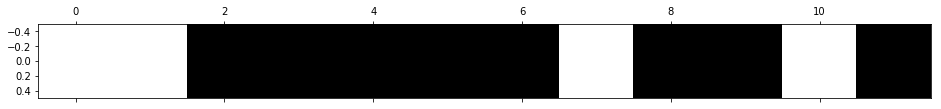

In [36]:
import numpy as np


mask = select.get_support()
print mask

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')

Choose 3 different models and then tune their hyper-parameters using Grid-Search

In [37]:
# Your Code here
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn import svm

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
cv = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5)

grid.fit(data_train_norm, target_train_norm)
grid.score(data_test_norm, target_test_norm)

-0.0009367402098321431

In [ ]:
from sklearn.svm import SVC

grid1 = GridSearchCV(SVC(), param_grid=param_grid, cv=5)

grid1.fit(data_train_norm, target_train_norm)
grid1.score(data_test_norm, target_test_norm)

Get the accuracy results with Cross-validation, which model is the best?

In [20]:
# Your Code here
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, data_train_norm, target_train_norm, cv=5)
scores

In [38]:
clf = svm.SVR(kernel='linear', C=1)
scores1 = cross_val_score(clf, data_train_norm, target_train_norm, cv=5)
scores1

array([-0.00253803, -0.0031598 , -0.0092238 , -0.00686348, -0.00680068])